<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
   
</figure>

#  Voorbeeld KNMI data inlezen met Pandas


In [2]:
import pandas as pd

Stel notebook in om figuren direct weer te geven in de notebook (soms niet nodig, maar op mijn (Davíds) computer wel.)

In [4]:
%matplotlib inline

`pd.read_csv` voorbeeld met omzetten datums naar datum object

In [5]:
df = pd.read_csv("./etmgeg_240.txt", skiprows=47, parse_dates=[1],
                index_col="YYYYMMDD")
df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,10,13,15,16,17,18,19,20,22,23,24,26,27,28,29,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,# STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
1951-01-01,240,188,77,87,195,18,41,24,,,...,,,,7,90,98,6,73,20,
1951-01-02,240,153,41,41,82,4,10,21,,,...,,,,8,93,98,9,88,1,
1951-01-03,240,203,15,21,51,24,0,3,,,...,,,,6,94,100,21,83,12,
1951-01-04,240,193,77,77,103,15,51,1,,,...,,,,7,94,97,12,89,8,
1951-01-05,240,207,82,87,144,21,36,24,,,...,,,,8,95,100,5,89,14,


Kijk naar het datatype van de data in de verschillende kolommen. Voor plotten en wiskunde moeten het type `int` of `float` zijn.

In [6]:
df.dtypes

# STN     int64
DDVEC     int64
FHVEC     int64
   FG     int64
  FHX     int64
 FHXH     int64
  FHN     int64
 FHNH     int64
  FXX    object
 FXXH    object
   TG     int64
   TN     int64
  TNH    object
   TX     int64
  TXH    object
 T10N    object
T10NH    object
   SQ    object
   SP    object
    Q    object
   DR    object
   RH    object
  RHX    object
 RHXH    object
   PG     int64
   PX    object
  PXH    object
   PN    object
  PNH    object
  VVN    object
 VVNH    object
  VVX    object
 VVXH    object
   NG    object
   UG    object
   UX    object
  UXH    object
   UN    object
  UNH    object
 EV24    object
dtype: object

Bekijk de kolommen. Vervelend genoeg voor ons staan er nog spaties in de kolomnamen.

In [7]:
df.columns

Index(['# STN', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH', '  FHN', ' FHNH',
       '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX', '  TXH', ' T10N',
       'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH', '  RHX', ' RHXH',
       '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN', ' VVNH', '  VVX',
       ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN', '  UNH', ' EV24'],
      dtype='object')

De spaties uit de kolomnamen verwijderen met `str.split`

In [8]:
new_names = []
for icol in df.columns:
    new_names.append(icol.strip())
new_names

['# STN',
 'DDVEC',
 'FHVEC',
 'FG',
 'FHX',
 'FHXH',
 'FHN',
 'FHNH',
 'FXX',
 'FXXH',
 'TG',
 'TN',
 'TNH',
 'TX',
 'TXH',
 'T10N',
 'T10NH',
 'SQ',
 'SP',
 'Q',
 'DR',
 'RH',
 'RHX',
 'RHXH',
 'PG',
 'PX',
 'PXH',
 'PN',
 'PNH',
 'VVN',
 'VVNH',
 'VVX',
 'VVXH',
 'NG',
 'UG',
 'UX',
 'UXH',
 'UN',
 'UNH',
 'EV24']

Het hernoemen van de kolommen van de oorspronkelijke dataframe

In [9]:
df.columns = new_names

Weer bekijken van de columns om te kijken of het gelukt is.

In [10]:
df.columns

Index(['# STN', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX',
       'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP',
       'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN',
       'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24'],
      dtype='object')

Het instellen van een Index met datums kan heel handig werken. Zo kan je gemakkelijk een bepaalde periode selecteren. Hier kiezen we het jaar 2018, en kijken we alleen naar de kolommen "RH"= dagelijkse neerslag en "EV24"=verdamping per dag. Met het `.head()` commando kijken we alleen naar de eerste 5 waarden uit de DataFrame.

In [11]:
df.loc["2018", ["RH", "EV24"]].head()

,RH,EV24
YYYYMMDD,,
2018-01-01,10,3
2018-01-02,44,2
2018-01-03,86,1
2018-01-04,5,2
2018-01-05,35,1


Omdat we niet de hele tijd de selectie willen typen slaan we onze subselectie op onder een nieuwe variabele `dfs`

In [12]:
dfs = df.loc[:, ["RH", "EV24"]]

Nu willen we deze data plotten. Maar dat levert nu nog een error op:

In [13]:
dfs.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

De error zegt onderaan er geen data is:

```{python}
TypeError: Empty 'DataFrame': no numeric data to plot
```

Maar we zagen net dat er wel degelijk waarden in de tabel stonden. Zou het misschien aan het datatype kunnen liggen?

In [12]:
dfs.dtypes

RH      object
EV24    object
dtype: object

Dat is dus het probleem, voor de plot moet de data wel numeriek zijn, dus `int` of `float` en niet `object`. We gaan per kolom de data omzetten naar numerieke waardes met de functie van pandas `pd.to_numeric`. Omdat pandas niet direct begrijpt hoe je een leeg veld moet omzetten naar een getal moeten we de functie ook vertellen dat als ie zoiets tegenkomt een waarde van `NaN` (Not a Number) moet invullen. Dat doen we met het keyword argument `errors="coerce"`.

In [13]:
for icol in dfs.columns:
    print(icol)
    dfs[icol] = pd.to_numeric(dfs[icol], errors="coerce")

RH
EV24


Kijken of dat gelukt is:

In [14]:
dfs.dtypes

RH      float64
EV24    float64
dtype: object

Poging 2 om te plotten dan maar:

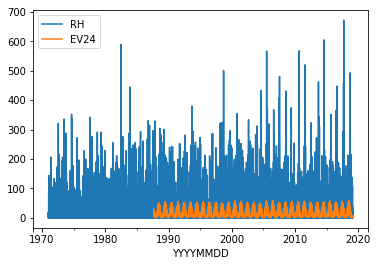

In [15]:
dfs.plot()

Even kijken naar de index. Dat is dus een `DateTimeIndex`, die bepaalde functionaliteit met zich meebrengt.

In [16]:
dfs.index

DatetimeIndex(['1951-01-01', '1951-01-02', '1951-01-03', '1951-01-04',
               '1951-01-05', '1951-01-06', '1951-01-07', '1951-01-08',
               '1951-01-09', '1951-01-10',
               ...
               '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30',
               '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03',
               '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', name='YYYYMMDD', length=24873, freq=None)

Zo kunnen we het jaar van elke regel opvragen

In [17]:
dfs.index.year

Int64Index([1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='YYYYMMDD', length=24873)

Of de dag:

In [18]:
dfs.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='YYYYMMDD', length=24873)

Om analyses te doen om subselecties uit je dataset is de `groupby` methode zeer geschikt. Zo pak je op basis van een bepaalde eigenschap steeds een groep uit je dataset die die eigenschap delen. Hier wil ik de data groeperen per jaar.

In [19]:
gr = dfs.groupby(by=dfs.index.year)

Vervolgens kan ik de som van elk jaar bereken met dit commando:

In [20]:
gr.sum()

,RH,EV24
YYYYMMDD,,
1951,0.0,0.0
1952,0.0,0.0
1953,0.0,0.0
1954,0.0,0.0
1955,0.0,0.0
1956,0.0,0.0
1957,0.0,0.0
1958,0.0,0.0
1959,0.0,0.0


Het resultaat van een `df.groupby()` is een GroupBy Object. Dat is een beetje een vaag ding. Het belangrijkste om te weten is dat je dingen als `gr.sum()`, `gr.mean()`, `gr.plot` gewoon werken zoals op DataFrames. 

Ook handig is om te weten dat de groepen die gemaakt zijn te benaderen zijn via `gr.groups`:

In [21]:
from IPython.display import display

In [22]:
for groupname, group in gr:
    # Ik wil niet alles printen, dus alleen na 2016
    if groupname > 2016:
        print(groupname)
        display(group.head())

2017


,RH,EV24
YYYYMMDD,,
2017-01-01,6.0,1.0
2017-01-02,20.0,3.0
2017-01-03,4.0,2.0
2017-01-04,6.0,3.0
2017-01-05,-1.0,4.0


2018


,RH,EV24
YYYYMMDD,,
2018-01-01,10.0,3.0
2018-01-02,44.0,2.0
2018-01-03,86.0,1.0
2018-01-04,5.0,2.0
2018-01-05,35.0,1.0


2019


,RH,EV24
YYYYMMDD,,
2019-01-01,5.0,3.0
2019-01-02,-1.0,2.0
2019-01-03,-1.0,4.0
2019-01-04,-1.0,1.0
2019-01-05,1.0,1.0


Hier maken we een barplot van de som van de neerslag en verdamping per jaar.

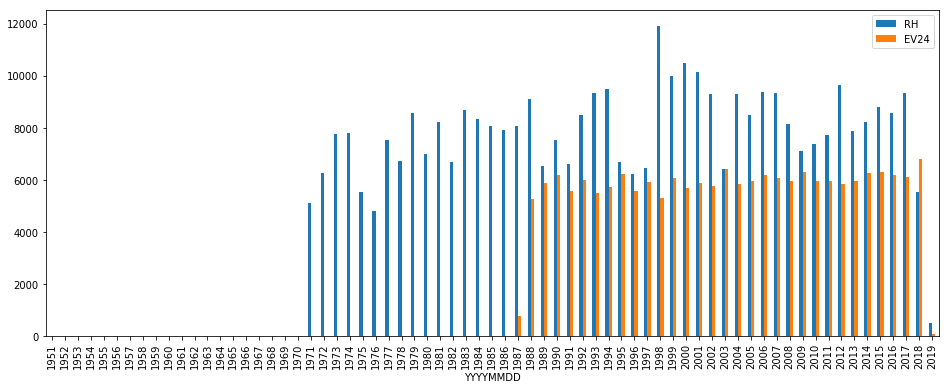

In [23]:
gr.sum().plot.bar(figsize=(16, 6))

Berekenen van het neerslagoverschot in 2018 = Neerslag - Verdamping:

In [24]:
no = dfs.loc["2018", "RH"] - dfs.loc["2018", "EV24"]

Plotten van cumulatieve Neerslag, Verdamping en neerslagoverschot in dezelfe grafiek.

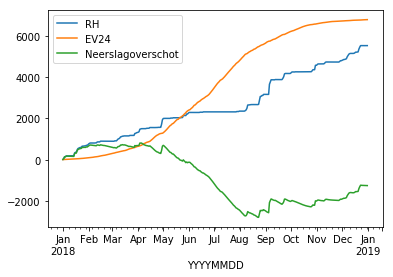

In [25]:
ax = dfs.loc["2018", "RH"].cumsum().plot(legend=True)
dfs.loc["2018", "EV24"].cumsum().plot(ax=ax, legend=True)
no.cumsum().plot(ax=ax, label="Neerslagoverschot", legend=True)

Hoe vaak was de neerslag per dag meer dan 15.0 mm? De data staat nog in tiende millimeters

In [26]:
gt150  = dfs.loc[:, "RH"] > 150

Het resultaat is een reeks aan True/False, die ons verteld of er wel of niet aan de voorwaarde is voldaan.

In [27]:
gt150.head()

YYYYMMDD
1951-01-01    False
1951-01-02    False
1951-01-03    False
1951-01-04    False
1951-01-05    False
Name: RH, dtype: bool

Omdat True gelijk is aan 1 en False gelijk aan 0, kunnen we de som nemen van dit resultaat om het aantal dagen te tellen met meer dan 15 mm neerslag.

In [28]:
gt150.sum()

442

Het totale aantal dagen in de dataset is:

In [29]:
gt150.shape

(24873,)

Als we nu die specifieke dagen willen beschouwen (uit de dataset willen trekken) kan dat met `df.loc[<hier je True/False reeks>, <hier je kolomnaam>]`

In [30]:
dfs.loc[gt150, "RH"]

YYYYMMDD
1971-06-14    206.0
1971-06-19    153.0
1972-05-17    160.0
1972-05-27    173.0
1972-08-02    321.0
1972-09-09    215.0
1973-02-12    193.0
1973-04-02    206.0
1973-05-21    151.0
1973-06-02    199.0
1973-07-06    336.0
1973-07-17    188.0
1973-07-27    162.0
1973-08-29    171.0
1973-09-21    186.0
1973-09-29    287.0
1973-10-10    179.0
1973-10-19    287.0
1973-11-10    155.0
1974-06-10    160.0
1974-07-04    153.0
1974-09-05    352.0
1974-09-27    172.0
1974-10-04    337.0
1974-10-22    154.0
1974-10-28    170.0
1974-12-11    176.0
1975-07-18    272.0
1975-09-12    154.0
1975-09-27    154.0
              ...  
2015-11-30    190.0
2016-01-14    177.0
2016-01-30    154.0
2016-02-14    157.0
2016-05-30    169.0
2016-06-20    218.0
2016-06-23    365.0
2016-08-09    153.0
2016-08-19    269.0
2016-08-21    448.0
2016-10-02    187.0
2016-10-19    184.0
2016-11-10    187.0
2017-01-12    169.0
2017-07-06    165.0
2017-07-12    230.0
2017-07-29    293.0
2017-08-19    182.0
2017-08-30 

Voor het kopieren van data naar Excel `pd.to_clibpoard()` (de Pandas equivalent van `ctrl+c`) of `pd.to_excel()` (de Pandas equivalent van save.

In [39]:
dfs.to_clipboard()

En je kan het dan ook weer terug halen met `pd.read_clipboard()` (de pandas equivalent van `ctrl+v`) of `pd.read_excel()` (pandas equivalent van load).

In [42]:
df2 = pd.read_clipboard()
df2.head()

,YYYYMMDD,RH,EV24,Mijn Kolom
0,01/01/1951,0.0,0.0,1
1,02/01/1951,NaN,NaN,1
2,03/01/1951,NaN,NaN,1
3,04/01/1951,NaN,NaN,1
4,05/01/1951,NaN,NaN,1


Dat was dan het korte voorbeeld over data inlezen en visualiseren met Pandas en Python.